# Practice Making Plots

## Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like

Using the University of California, Irvine Absenteeism at Work Data Set.
This is from records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #For adding legend to KDE Plot
import seaborn as sns
% matplotlib inline

In [2]:
filepath = 'Absenteeism_at_work_AAA/Absenteeism_at_work.csv'
absent = pd.read_csv(filepath, sep=';')
print(absent.head())
#print(absent.info())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day             ...              Disciplinary failure

In [3]:
print(absent.Age.max())
print(absent.Age.min())
hours = 'Absenteeism time in hours'

58
27


In [4]:
# Creating another categorical variable for plotting
absent['age_group'] = ['20s' if ((x >= 20) & (x < 30))
                       else '30s' if ((x >= 30) & (x < 40))
                       else '40s' if ((x >= 40) & (x < 50))
                       else '50s' for x in absent['Age']]

# Sort values by age range so following plots occur in order, 20s, 30s, 40s, 50s
absent.sort_values(by='age_group', inplace=True)


## Single Variable Plot #1 - Histogram with 20 bins

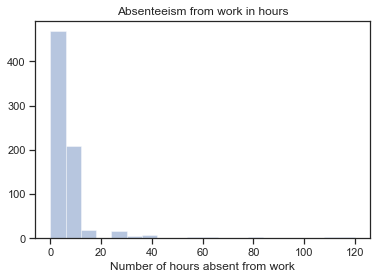

In [5]:
# Set seaborn style
sns.set(style='ticks')
sns.distplot(absent[hours], kde=False, bins=20)
plt.title('Absenteeism from work in hours')
plt.xlabel('Number of hours absent from work')
plt.show()


This shows where the majority of the absent hours are clustered.  It is also easy to understand.  However, it also makes it hard to see the outlier data points where a large number of hours were absent from work. It shows more granularity than the following plot.    

## Single Variable Plot #2 - Histogram with fewer (10) bins

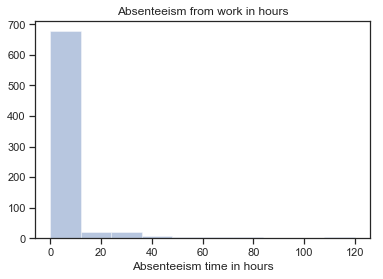

In [6]:
# Set seaborn style
sns.set(style='ticks')

sns.distplot(absent[hours], kde=False, bins=10);
plt.title('Absenteeism from work in hours')
plt.show()

This has even less granularity, but it makes it very clear that the majority of hours away from work are under 15 hours or so.  It shows how many data points are in that category.  Again, it is very hard to see that there are absences that were longer with only a few counts.  

## Single Variable Plot #3 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


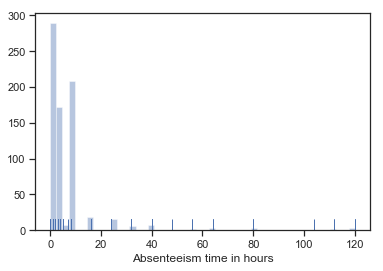

In [7]:
# Set seaborn style
sns.set(style='ticks')

sns.distplot(absent[hours], kde=False, rug=True);
plt.show()


The rug plot shows a histogram of the counts of hours missed by employees and a small vertical tick at each observation. This is kind of nice because it makes it possible to see those values that earlier were invisible because they were short. However, it is also more cluttered, and not everyone knows what tick marks on a bar graph mean.     

## Single Variable Plot #4

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


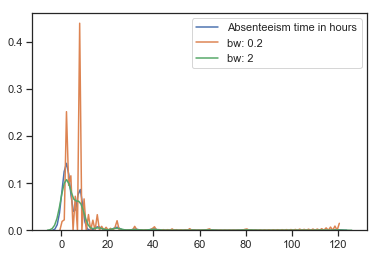

In [8]:
sns.kdeplot(absent[hours])
sns.kdeplot(absent[hours], bw=.2, label="bw: 0.2")
sns.kdeplot(absent[hours], bw=2, label="bw: 2")
plt.legend();
plt.show()

This is a kernel density estimation graph.  It is computationally more expensive than a histogram.  It can be used to approximate the underlying distribution.  It approximates a gaussian curve at each data point and then combines them together.  Changing the bw or bandwidth of the graph changes how tightly the curve is fit to the data. One interesting thing to note is that the graph does    

# Plot 2 Continuous Variables 

### New Data Set
https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Attribute Information:

For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
Output variable (based on sensory data): 
12 - quality (score between 0 and 10) 

Units in screen shot below, from Cortez et al. 2009

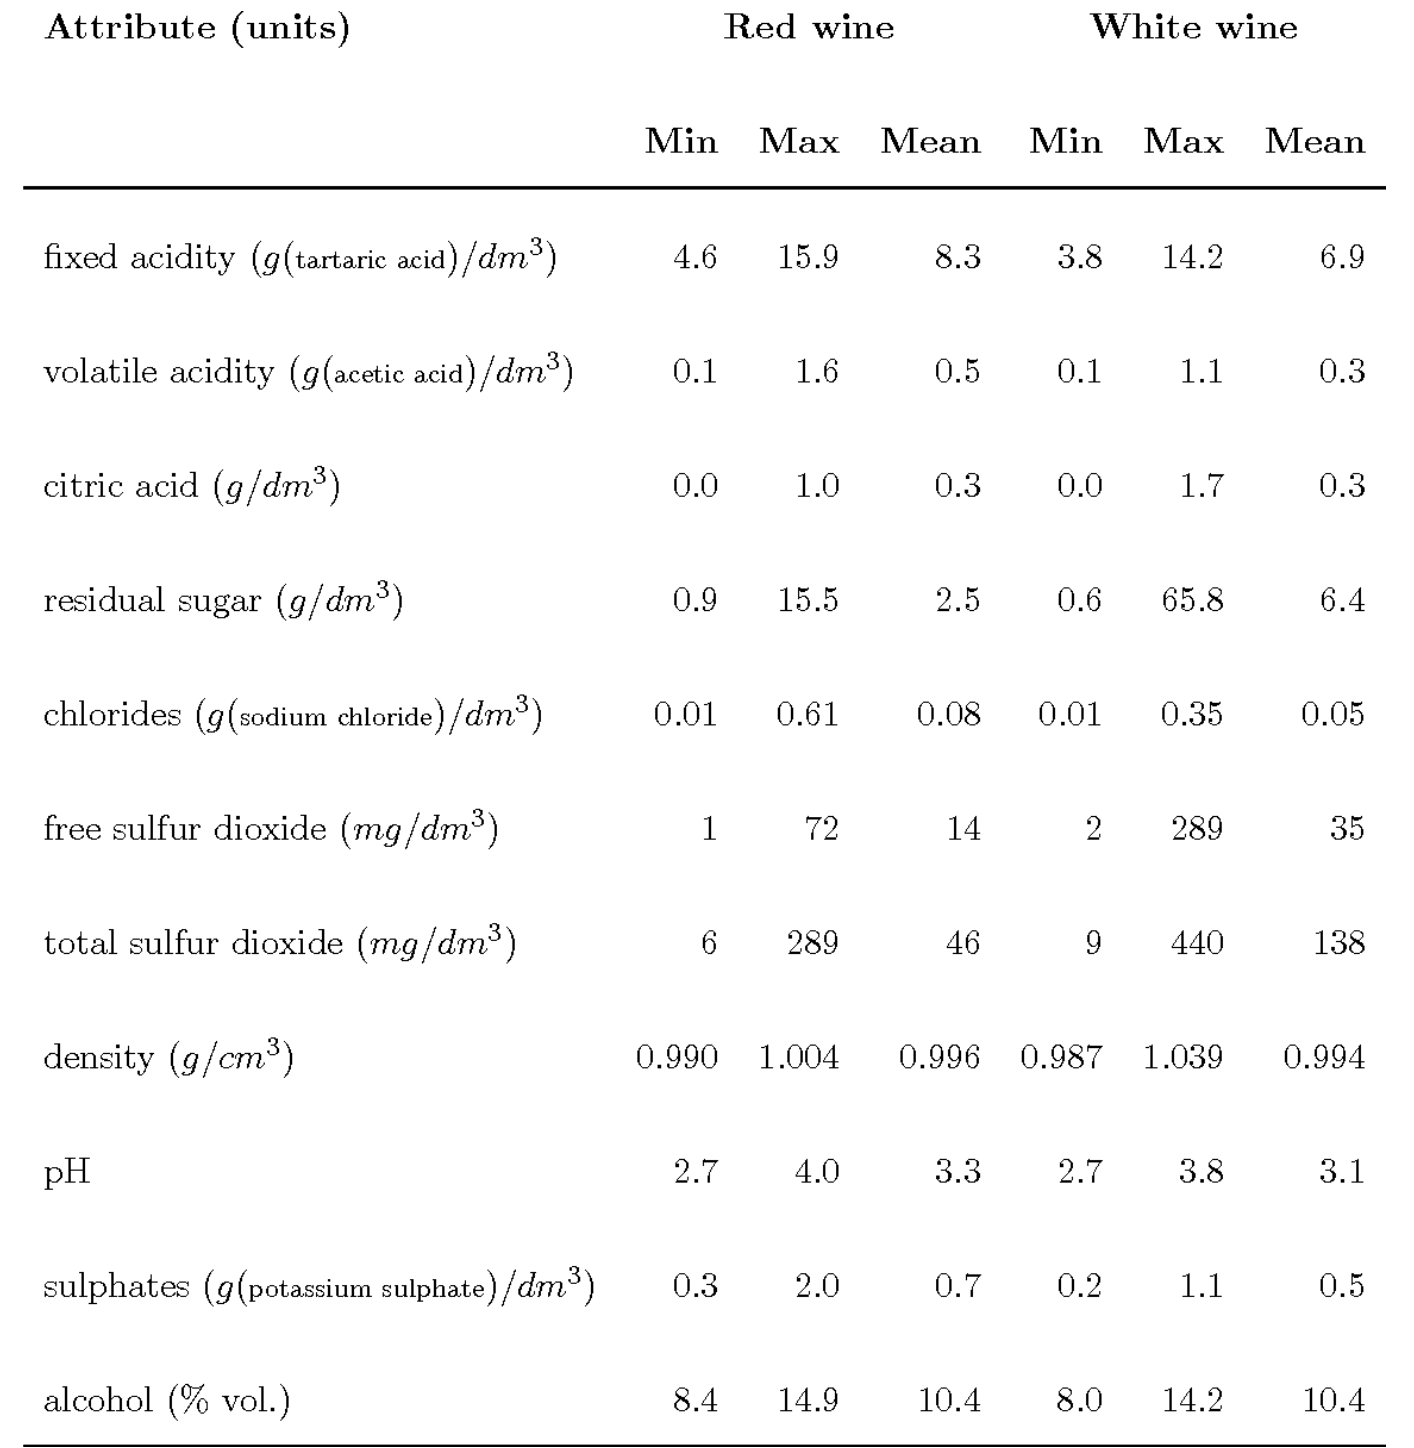

In [9]:
wine_file = 'winequality-white.csv'
wine = pd.read_csv(wine_file, sep=';')
print(wine.head())
#print(wine.info())

red_wine = pd.read_csv('winequality-red.csv', sep=';')
#print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

## Pairplots - Just for fun

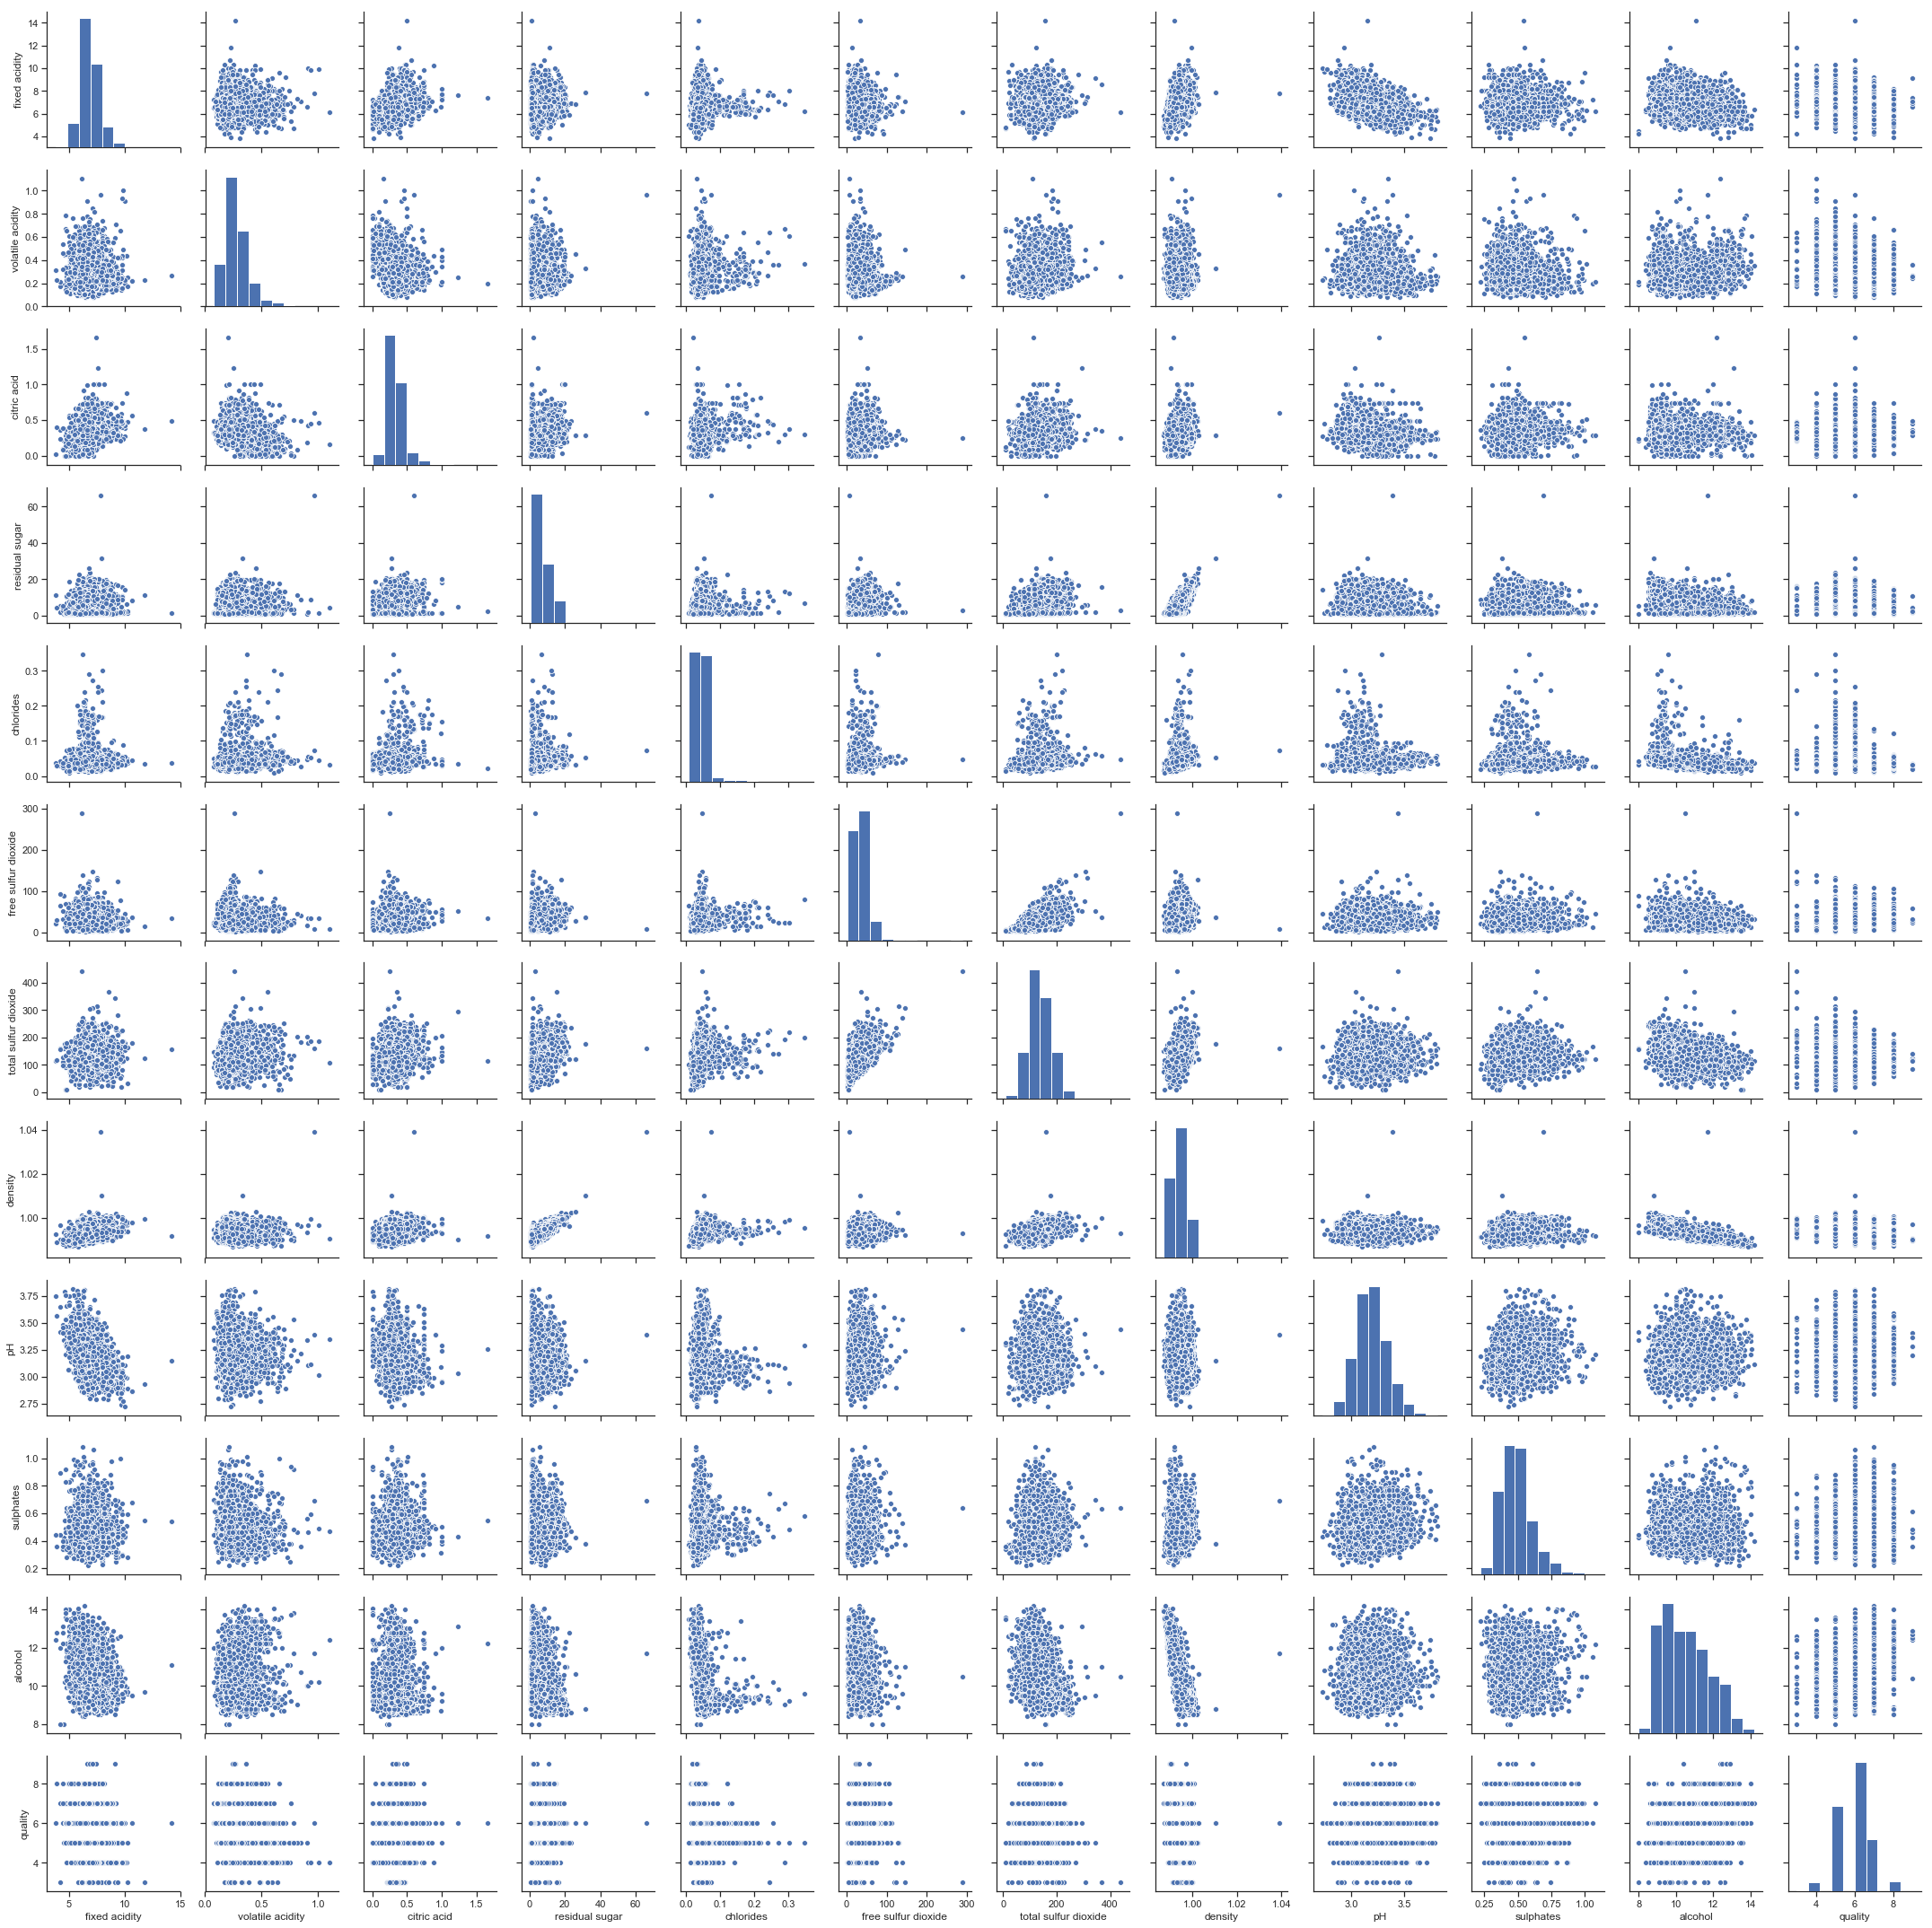

In [10]:
# Looking for which variables might be fun to plot.  Mostly I just like pairplots.
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(wine)
plt.show()

Pair plots are great because they can show a lot of information quickly.  With one line of code you can quickly see the relationship between every pair of data.  However, it is clear to see from this pair plot that once you have too many variables, it can be hard to read a pair plot.  Also, when presenting data to someone else, it can take a long time to interpret this quantity of data presented.

## Two Continuous Variables Plot 1 -  Scatterplot 

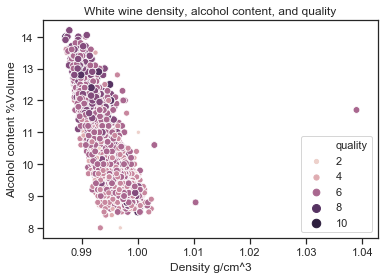

In [11]:
sns.scatterplot(x='density', y='alcohol', data=wine, size='quality', hue='quality')
plt.title('White wine density, alcohol content, and quality')
plt.ylabel('Alcohol content %Volume')
plt.xlabel('Density g/cm^3')
plt.show()

Scatter plots are easy to view and understand.  In this instance, I added a third variable, hue, to denote the quality of the wine. One con is that it is hard to see what quantity of points are present on this graph.  Another con is that it overall shows less information than when a fit line is also present.

## Two Continous Variables Plot 2 - Scatterplot with fit line

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


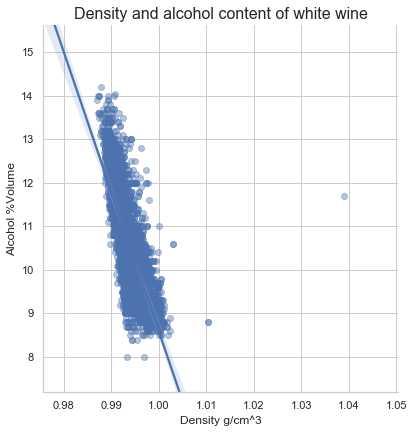

In [12]:
sns.set_style('whitegrid')
g = sns.lmplot(x='density', y='alcohol', data=wine,
              fit_reg=True, scatter_kws={'alpha':0.4}, height=6)

# Adjust y axis to zoom in on relationship a little
ymin = wine['alcohol'].min()*0.9
ymax = wine['alcohol'].max()*1.10
plt.ylim([ymin, ymax])

plt.xlabel('Density g/cm^3')
plt.ylabel('Alcohol %Volume')
plt.title('Density and alcohol content of white wine', fontsize=16)
plt.show()

This plot has a fit line with confidence intervals plotted.  It's interesting because where your eyes would predict the fitline should be don't correspond to the actual fit line.  This is likely because the overlapping dots make it hard to determine the distribution of the points and where there are the most points.  The ine adds information, but also more to interpret which can take longer when trying to read the graph.

## Two Continuous Variables Plot 3 - KDE Plot
This plot is fun because it shows the most frequent values between alcohol and density.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


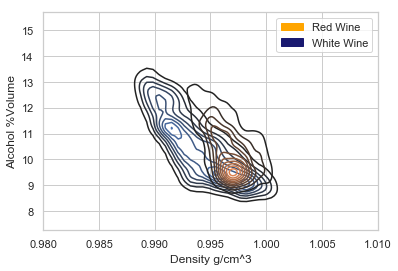

In [13]:
sns.set_style('whitegrid')
x = wine['density']
y = wine['alcohol']

xred = red_wine['density']
yred = red_wine['alcohol']

plt.xlim(0.98, 1.01)

g = sns.kdeplot(x, y)
g = sns.kdeplot(xred, yred)

plt.xlabel('Density g/cm^3')
plt.ylabel('Alcohol %Volume')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='midnightblue', label='White Wine')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

This graph is fun because it shows the density of the points on the graph. This was something that the scatterplot did not do well.  However, it is difficult for a casual observer to interpret and computationally expensive.  

## Two Continous Variables Plot 4 - Hexbin plot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


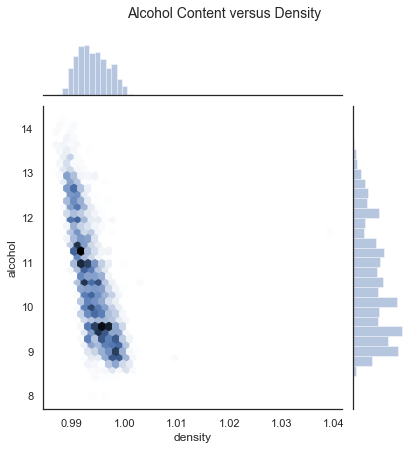

In [14]:
sns.set_style("white")

g = sns.jointplot(x=x, y=y, kind="hex", color="b")
#plt.title('White Wine Alcohol Content vs. Density', loc='center')

# Takes some effort to get title above the graph
fontdict_title = {'fontsize': 14,
                  'verticalalignment': 'bottom',
                  'horizontalalignment':'right',
                  'position': (-.6,1.0)
                 }

plt.title('Alcohol Content versus Density', fontdict=fontdict_title, pad=85)

plt.show()

This is a good compromise between a scatterplot and a kde.  It shows the density in a way that is a little easier to understand and can have histograms on the sides to further clarify the distribution.  However, for someone unused to this type of graph, it would be more difficult to interpret than a scatter plot.  Also, in Seaborn it is difficult to format the axis properly with this graph.

# Plots of 1 Continuous, 1 Categorical Variable 

## Continuous and Categorical Plot 1 - Boxplots

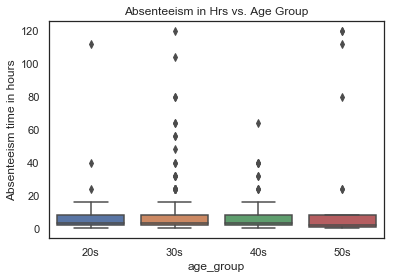

In [15]:
# Try using boxplots
ax = sns.boxplot(x='age_group', y='Absenteeism time in hours', data=absent)
plt.title('Absenteeism in Hrs vs. Age Group')
plt.show()

Boxplots are generally well understood.  It is also a good way to visualize outliers.  However outliers can squash the boxes together and make it hard to see the mean. Also, you can't see the distribution of the points inside the box. 

## Continuous and Categorical Plot 2 - Bar Plot 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


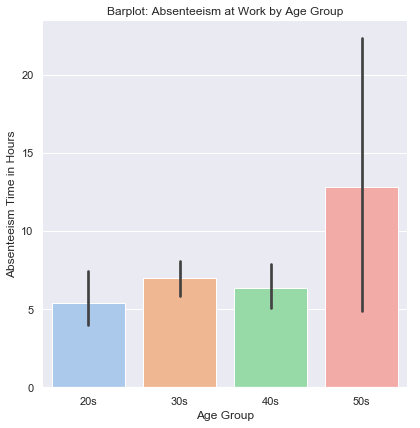

In [16]:
sns.set(style='darkgrid')

g = sns.catplot(x='age_group', y='Absenteeism time in hours', 
                   data=absent, height=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Absenteeism Time in Hours')
g.set_xlabels('Age Group')
plt.title('Barplot: Absenteeism at Work by Age Group')
plt.show()

This barplot clearly shows the mean for each group.  This makes the means easy to interpret.  This one also shows the confidence interval for that mean.  This graph is simple to understand, but it loses the distribution of the data points for each of the categorical variables.  For instand, were there more data points for absences for people in their 20s, or for those in their 50s?  

## Continous and Categorical Plot 3 - Pointplot


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


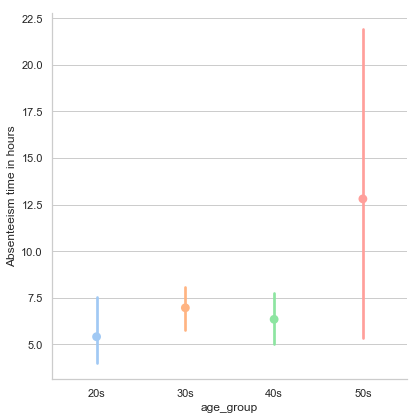

In [17]:
sns.set(style='whitegrid')

g = sns.catplot(x='age_group', y='Absenteeism time in hours', data=absent, 
               height=6, kind='point', palette='pastel', ci=95)

This makes it very easy to compare the means and the confidence intervals between the groups.  It loses information about the quantity of data points and some about the range of values the data points may have.

## Continous and Categorical Plot 4 - Violin Plot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


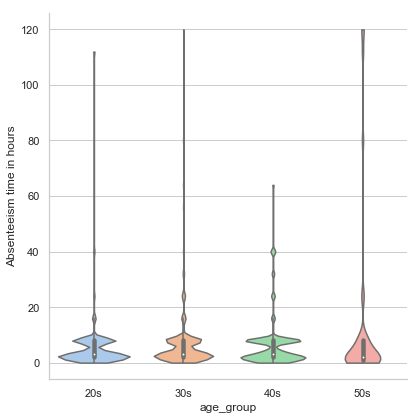

In [18]:
sns.set(style='whitegrid')

# Adjusted bandwidth smaller than default because of negative values
g = sns.catplot(x='age_group', y='Absenteeism time in hours', data=absent, 
               height=6, kind='violin', palette='pastel', bw=.1, cut=0)


The violin plot looks cool, but it has a kernal estimator that doesn't know that negative values are impossible.  I tried to reduce this effect by changing teh bandwidth to 0.1, but this artifact cannot be completely eliminated.  I do like how it is wider at areas with more datapoints, giving a little more insight into the the trends of absenteeism than a boxplot, but the boxplot was better for limiting it to values that can actually exist. I can also try cutting it off at 0. I like how it shows the distribution of data points, but I also think that it is not very well known and may be hard for people to interpret.

https://stackoverflow.com/questions/28115637/how-to-better-fit-seaborn-violinplots/28119908#28119908

## Continuous and Categorical Plot 5 - Swarm plot

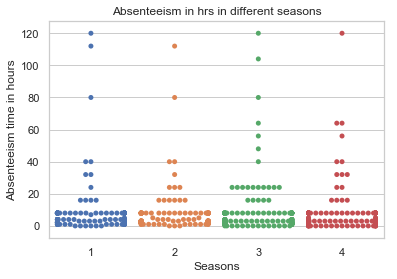

In [19]:
ax = sns.swarmplot(x='Seasons', y='Absenteeism time in hours', data=absent)
plt.title('Absenteeism in hrs in different seasons')
plt.show()

[]

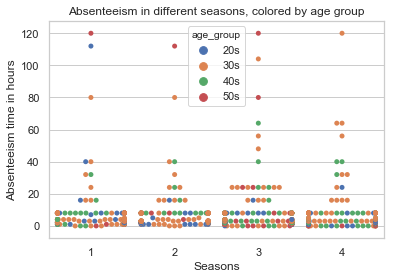

In [20]:
ax = sns.swarmplot(x='Seasons', y='Absenteeism time in hours', hue='age_group', data=absent)
plt.title('Absenteeism in different seasons, colored by age group')
plt.plot()

[]

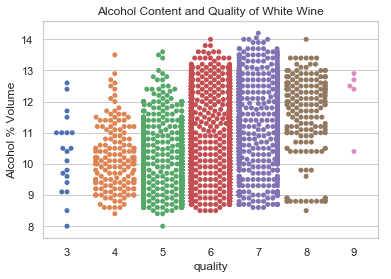

In [21]:
ax = sns.swarmplot(x='quality', y='alcohol', data=wine)
plt.title('Alcohol Content and Quality of White Wine')
plt.ylabel('Alcohol % Volume')
plt.plot()

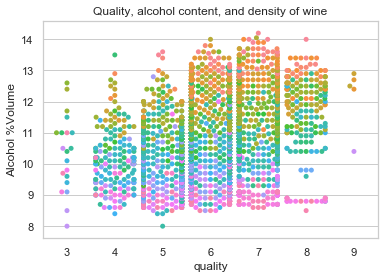

In [22]:
ax = sns.swarmplot(x='quality', y='alcohol', hue='density', data=wine)
ax.legend().set_visible(False)
plt.title('Quality, alcohol content, and density of wine')
plt.ylabel('Alcohol %Volume')
plt.show()

A swarm plot shows all the points and can be a good representation of the distribution of values.  However, once there are a lot of data points, it can be messy and crowded.  It is also difficult to immediately see values like the mean. For the case where I color coded the density of the wine as well, a general trend can be seen, but it is really trying to show too much for the space.   

### Continuous and Categorical Plot 6 - Boxplot and stripplot together 

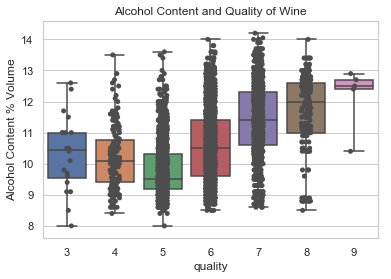

In [23]:
ax = sns.boxplot(x="quality", y="alcohol", data=wine, whis=np.inf)
ax = sns.stripplot(x="quality", y="alcohol", data=wine,
                  jitter=True, color=".3")
plt.ylabel('Alcohol Content % Volume')
plt.title('Alcohol Content and Quality of Wine')
plt.show()

Combining the Boxplot with the stripplot overcomes the problem with boxplots where it is hard to tell the distribution.  However, with a larger dataset, it becomes very crowded.  If jitter is true, more of the data points are uncovered, but if it is false, it is hard to tell if data points are overlapping.  There is a gain in information over just having a box plot, but you gain some readability.

### Boxplot by itself 

Text(0,0.5,'Alcohol % Volume')

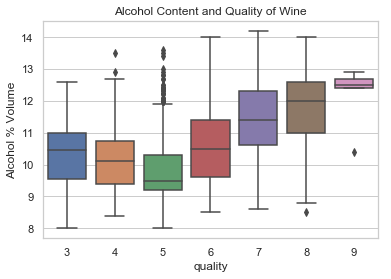

In [24]:
ax = sns.boxplot(x="quality", y="alcohol", data=wine)
plt.title('Alcohol Content and Quality of Wine')
plt.ylabel('Alcohol % Volume')

This was just to show how much cleaner this graph is without the stripplot.

### Continuous and Categorical Plot 7 - Boxenplot 

Text(12.085,0.5,'Alcohol Content % Volume')

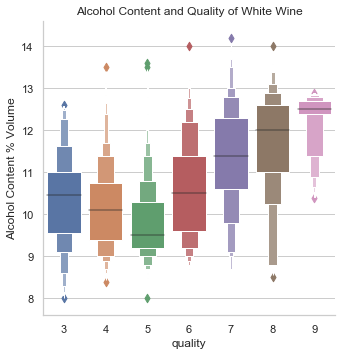

In [25]:
sns.catplot(x="quality", y="alcohol", kind="boxen",
            data=wine)
plt.title('Alcohol Content and Quality of White Wine')
plt.ylabel('Alcohol Content % Volume')

This graph attempts to give more information than a box plot.  It adds more granularity to a box plot.  However, I don't think many people are used to seeing this type of graph and as such it could be difficult to interpret. 

### Violinplot again - wine dataset this time

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


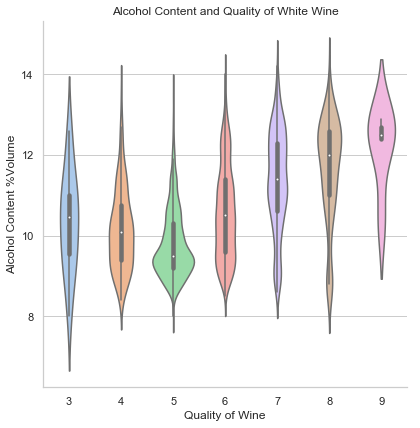

In [26]:
sns.set(style='whitegrid')

# Adjusted bandwidth smaller than default because of negative values
g = sns.catplot(x='quality', y='alcohol', data=wine, 
               height=6, kind='violin', palette='pastel')

plt.title('Alcohol Content and Quality of White Wine')
plt.xlabel('Quality of Wine')
plt.ylabel('Alcohol Content %Volume')
plt.show()

This worked a bit better for this data set.  The values are more plausible.  Again, it makes a pretty graph and gives a lot of information, but it's also an estimation of the distribution that is smoothed how I choose, and probably less familiar for people to interpret.

### Another barplot - using wine data

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


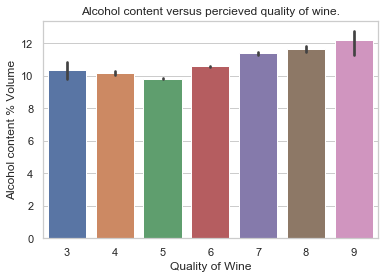

In [27]:
ax = sns.barplot(x="quality", y="alcohol", data=wine)
plt.title('Alcohol content versus percieved quality of wine.')
plt.xlabel('Quality of Wine')
plt.ylabel('Alcohol content % Volume')
plt.show()

Similar pros and cons as listed with the Absenteeism data set.  I was just curious to see it plotted.  

### Strip Plot - Wine data

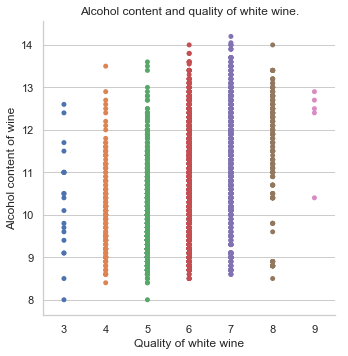

In [28]:
sns.catplot(x="quality", y="alcohol", jitter=False, data=wine);
plt.title('Alcohol content and quality of white wine.')
plt.xlabel('Quality of white wine')
plt.ylabel('Alcohol content of wine')
plt.show()

Without jitter it can be hard to tell the underlying distribution of values.  It is also hard to visulize the mean.  It is better for showing on smaller data sets the distribution of values.

## Challenge
Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

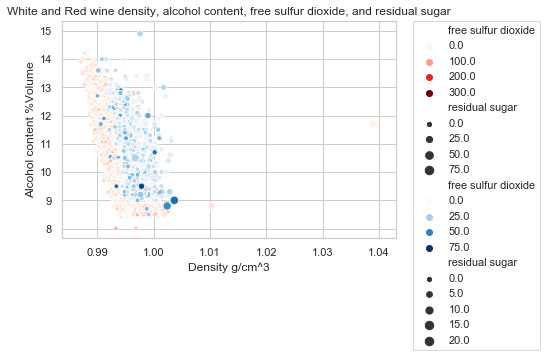

In [29]:
g = sns.scatterplot(x='density', y='alcohol', data=wine, size='residual sugar', 
                    hue='free sulfur dioxide', palette='Reds')

g = sns.scatterplot(x='density', y='alcohol', data=red_wine, size='residual sugar', 
                    palette="Blues", hue='free sulfur dioxide')

plt.title('White and Red wine density, alcohol content, free sulfur dioxide, and residual sugar')
plt.ylabel('Alcohol content %Volume')
plt.xlabel('Density g/cm^3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Here I show 4 continuous variables and 1 categorical variable on a single graph.  
1) Wine type: Palette, blues for red wine, reds for white wine <br>
2) Alcohol Content: y-axis <br>
3) Density: x-axis <br>
4) Free Sulfur Dioxide: Hue <br> 
5) Residual Sugar: Size of dot <br>

Mostly, this is way too much info in too little space. It would take a long time to interpret. With a dataset with fewer points or ones more spread out, maybe this could be made to work, but for this data set we are better off with a different method of graphing to show these relationships. 

In [30]:
# Combine my white and red wine data frames in order to use color of wine as a categorical variable
white_wine2 = wine
white_wine2['type'] = 'white'
red_wine2 = red_wine
red_wine2['type'] = 'red'
wine_combine = pd.concat([white_wine2, red_wine2])

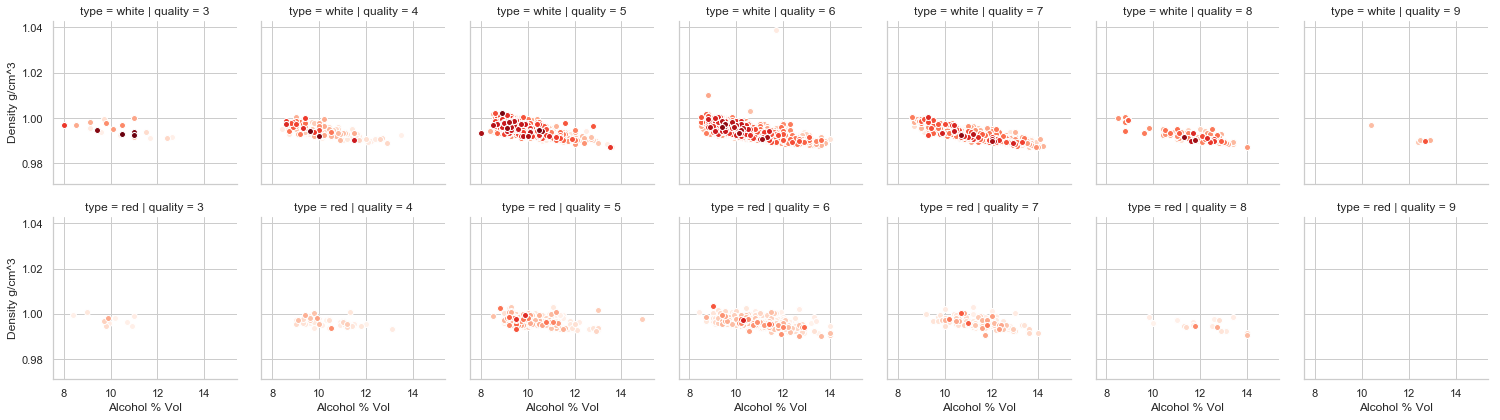

In [31]:
g = sns.FacetGrid(wine_combine, col='quality', row='type', hue='free sulfur dioxide', palette='Reds')
g = (g.map(plt.scatter, "alcohol", "density", edgecolor="w").set_axis_labels('Alcohol % Vol', 'Density g/cm^3'))

This grid of graphs now shows 3 continuous variables and 2 categorical variables.  I can add more categorical variables to this by changing the shape of the points, but it's harder to add another continuous variable.  This would also be easier to read if some of the quality cateogries were combined.  This is a few too many graphs in one space.  